In [1]:
# 스킷런을 먼저 다운받는다

import sklearn

'1.0.2'

# Linear regression

## 공부시간에 따른 점수변화

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv("LinearRegressionData.csv")

In [8]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [44]:
x = dataset.iloc[:, :-1].values
#iloc -> 위치기반으로 움직임
# : >> 전부 다 가져온다
#처음부터 마지막 컬럼 직전까지의 데이터만 가져옴
#.values -> 값들을 array형식으로 가져오겠다
y = dataset.iloc[:, -1].values

In [45]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

# 위의 데이터를 이용해 선형회귀모형만들기

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#객체생성

#fit -> 학습하는 모델

In [47]:
reg.fit(x,y)

LinearRegression()

In [48]:
#위의 x와 y를 통해 학습해서 나온 x의 추정치, 예측값 출력 -> predict이라는 함수
y_pred = reg.predict(x)


In [49]:
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

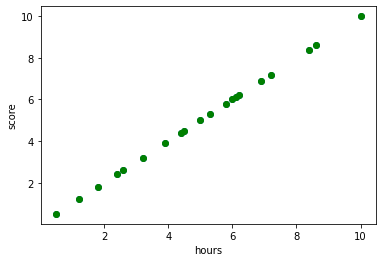

In [30]:
plt.scatter(x,y)
#scatter => 산점도
#color, linestyle등을 변경할 수 있음
plt.scatter(x,y , color = 'green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show() #해도되고 안해도됨

In [31]:
print("9시간 공부했을 때 예상점수 : ", reg.predict([[9]])) # [[9],[8],[7]]
#x가 2차원 배열이므로 [[]]이렇게 넣어줘야함

9시간 공부했을 때 예상점수 :  [[9.]]


In [51]:
#기울기
reg.coef_


array([10.44369694])

In [52]:
#y절편
reg.intercept_

-0.21848470286721522

In [54]:
y = mx +b -> y = 10.44369694x-0.21848470286721522

# 데이터 세트 분리

### 더 정확한 회귀모델을 만들기 위해서
- 예측값이 올바른지 확인하기 위해 데이터셋에서 일부를 남겨둬서 그걸로 학습, 올바른 정답이 나오는지 확인해봄

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [58]:
X = dataset.iloc[:, :-1].values # 맨 마지막꺼 뺴고 가져옴
y = dataset.iloc[:, -1].values # 맨마지막꺼 가져옴

In [59]:
#중요 이 한줄로 트레인세트를 나눌 수 있음 일일히 적어가며 분리안해도 됨! random하게 나눠줌!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 훈련 80 : 테스트 20 으로 분리
# X_train 이런건 다 이름 변경 가능함 
# test_size = test 크기를 20%로 쓰겠다
# random_state = 0 -> random하게 트레인셋을 뽑을 수 있게 조정가능, 이걸로 남의 train set과 동잃가ㅔ trainset을 출력할 수 있다


In [62]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [61]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [65]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

### 분리된 데이터를 통한 모델링

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [68]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 -> 앞과 똑같음

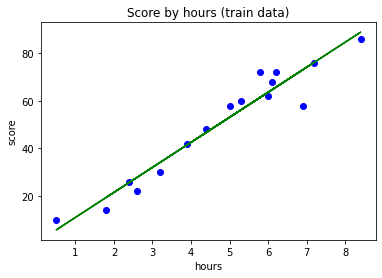

In [69]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 테스트셋으로검증

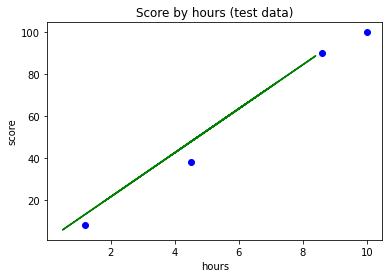

In [71]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()
# 직선은 위의 train셋과 동일하게, scatter로 점 찍어서 추이가 맞는지 확인

In [73]:
reg.coef_
#동일한 dataset으로 회귀모델을 만듦
#다른점은 하나는 train, test셋을 나눴다는 점
#아래 coef, intercept와 비교했을 때 조금 다른 걸 알 수 있음

array([10.49161294])

In [74]:
reg.intercept_

0.6115562905169796

In [51]:
#기울기
reg.coef_


array([10.44369694])

In [52]:
#y절편
reg.intercept_

-0.21848470286721522

### 모델 평가


In [75]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가
# 0~1 사이의 값이 나오고 0이면 굉장히 안좋은 모델, 1에 가까워야 좋다

0.9727616474310156

In [76]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

# 다중선형회귀

독립변수가 여러개

- 단순과 다중의 식 차이
- 독립변수가 2개가 되면 단순 2차원에서 선형으로 표시할 수 있던 단순과 달리 3차원이 됨(더 늘어나면 우리가 아는 공간으로 표시하기 hard)
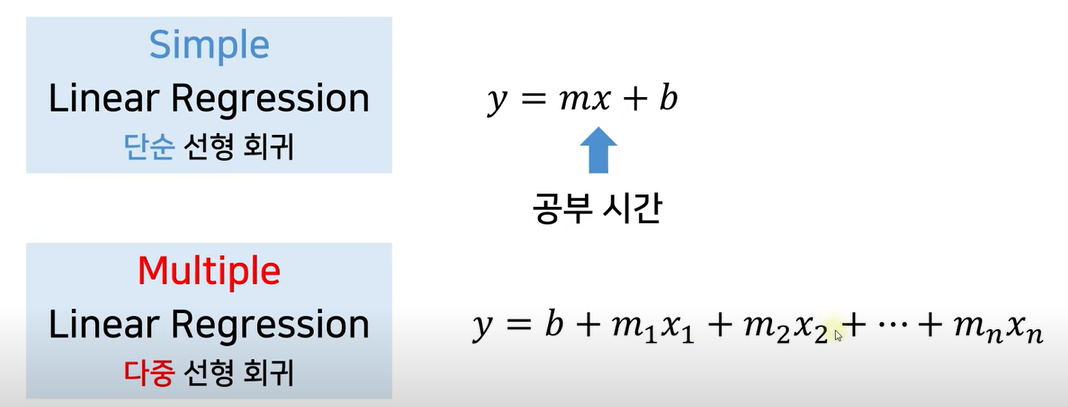






## 공부시간, 결석횟수, 공부 장소에 따른 시험성적 변화찾기

### 독립변수 : 공부시간, 결석횟수, 공부장소/ 종속변수 : 시험성적

- 문제1 : 공부장소는 숫자가 아니라 문자로 되어있음 -> 수정필요, 원핫 인코딩으로 수정하기
- 원핫 인코딩 : 원하는 값만 1로 나머지는 0으로 변경하는 방법

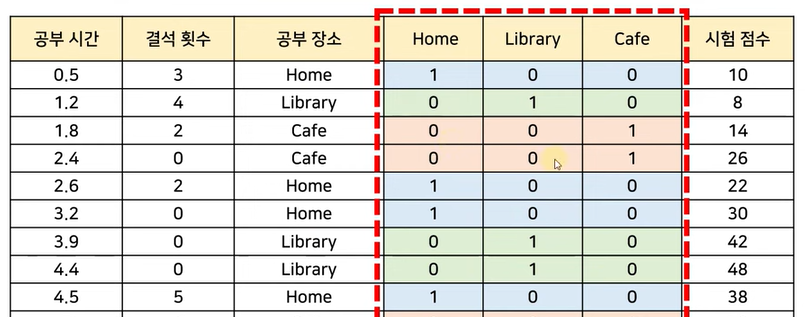
- 이런식으로

- 문제 2 : 다중공선성 
    다른 데이터들끼리 서로 연관이 있어서 선형관계가 제대로 나오지 않음 서로서로 독립적이지 않단 말임!
    
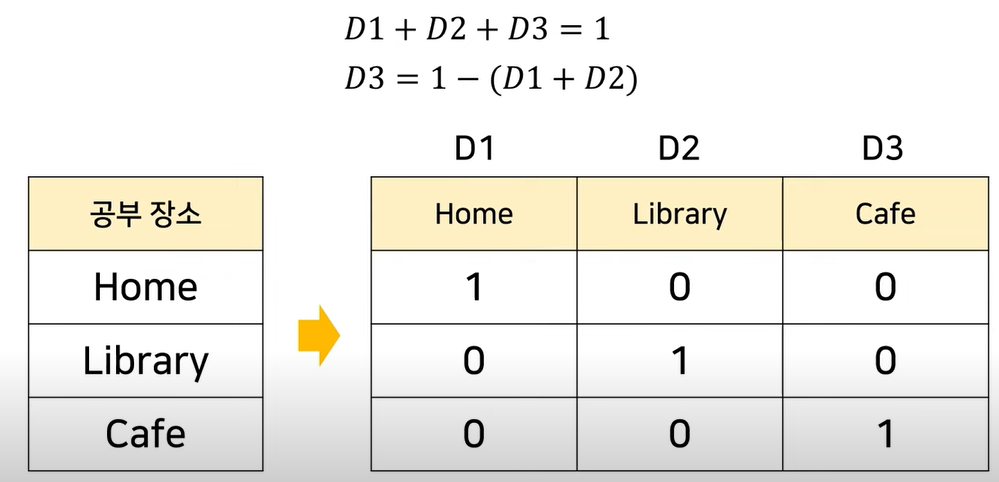

- 저 식이 성립된다 = 관련이 있다 -> 해결방법은 하나를 삭제하는것 (예시_d3칼럼 삭제)

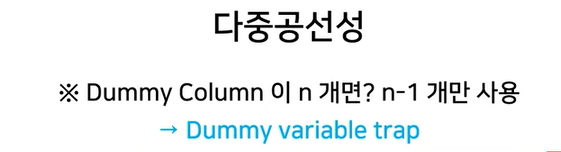

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("MultipleLinearRegressionData.csv")

In [3]:
#항상 array형식으로 가져와야하므로 (plot을 만들기 위해서) values 라는 함수 사용 필수!
x = dataset.iloc[:, :-1].values
#iloc -> 위치기반으로 움직임
# : >> 전부 다 가져온다
#처음부터 마지막 컬럼 직전까지의 데이터만 가져옴
#.values -> 값들을 array형식으로 가져오겠다
y = dataset.iloc[:, -1].values

In [4]:
x

array([[0.5, 3, 'Home'],
       [1.2, 4, 'Library'],
       [1.8, 2, 'Cafe'],
       [2.4, 0, 'Cafe'],
       [2.6, 2, 'Home'],
       [3.2, 0, 'Home'],
       [3.9, 0, 'Library'],
       [4.4, 0, 'Library'],
       [4.5, 5, 'Home'],
       [5.0, 1, 'Cafe'],
       [5.3, 2, 'Cafe'],
       [5.8, 0, 'Cafe'],
       [6.0, 3, 'Library'],
       [6.1, 1, 'Cafe'],
       [6.2, 1, 'Library'],
       [6.9, 4, 'Home'],
       [7.2, 2, 'Cafe'],
       [8.4, 1, 'Home'],
       [8.6, 1, 'Library'],
       [10.0, 0, 'Library']], dtype=object)

In [8]:
# 원핫인코딩
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
#'encoder' : 우리가 어떤 명령을 가할 지 정해주는 것
# 어떤걸 할지 넣어줌, 우리는 원핫인코딩을 할거니까 OneHot~하고 drop을 통해 첫번째 칼럼 지우기(다중공선성 해결)
# [2] : 어떤 데이터를 가지고 원핫인코딩을 적용할 건지 -> 칼럼인덱스 순
# remainder : 나머지 데이터는 어떻게 할거냐 passthrough-> 그대로 두겠다
X = ct.fit_transform(x)
X
# 1.0, 0.0 << 앞의 두개 숫자 = drop='first'를 했으므로 이를 제외한 나머지가 앞에 들어가 있음
# home은 1 0 , library는 0 1 , cafe는 0 0

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

### 데이터 세트 분리

In [16]:
from sklearn.model_selection import train_test_split
X_train,  X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

## 예측값과 실제값 비교

In [18]:
y_pred = reg.predict(X_test)

In [19]:
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [23]:
Y_test
#y_pred와 값이 그래도 좀 비슷함

array([ 90,   8, 100,  38], dtype=int64)

In [24]:
reg.coef_
#집, 도서관, 공부시간, 결석
# 집에서 공부하면 -5.8, 도서관에서 공부하면 -1, 카페에서 공부하는게 제일 낫다
# 공부시간이 1시간 늘면 10점씩 점수가 증가
# 결석 한번 할 때마다 -1.64점씩 됨

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

## 모델평가

In [25]:
reg.score(X_train, Y_train)

0.9623352565265527

In [26]:
reg.score(X_test, Y_test)

0.9859956178877445

# MAE : Mean Absolute Error

- 실제값과 예측값의 차이의 절대값들의 평균
- 제곱해서 나누기 값들의 개수를 함

# RMSE : MSE에 루트 씌운것

- 제곱을 통해 발생하는 왜곡을 해결할 수 있음

# R스퀘어

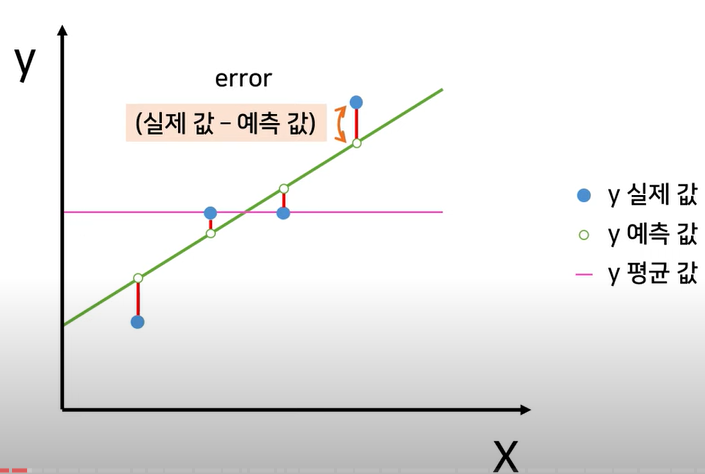
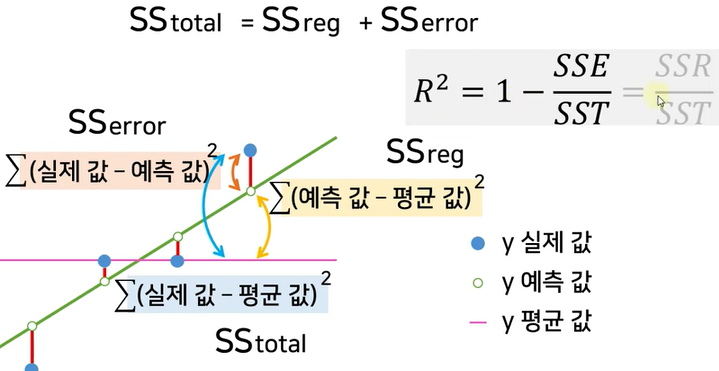

- r스퀘어는 1에 가까울 수록 좋음 0에 가까울 수록 나쁨

### 다양한 평가 지표 (회귀 모델)

- sklearn.metrics에 평가지표가 있음
- MAE를 하고싶으면 mean_absolute_error
- MSE를 하고싶으면 mean_squeared_error
- RMSE를 하고 싶으면 squared = False하기 (루트 씌운게 RMSE니까)
- r^2은 특이하게 r2_score하기

### 실제값과 예측값을 비교하는 것이므로 y_test, y_pred를 항상 비교

In [13]:
# 실제 값, 예측 값 # MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_pred) 

3.2253285188288023

In [14]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred) 

19.900226981515015

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred, squared=False) # RMSE

4.460967045553578

In [28]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred) # R2

#R2는 reg.score해서 나오는 값과 똑같음 즉, linear regression하면 자동으로 r2를 반환해준다는 뜻임

0.9859956178877445

In [25]:
reg.score(X_train, Y_train)

0.9623352565265527

In [26]:
reg.score(X_test, Y_test)

0.9859956178877445